In [1]:
import torch
from PIL import Image
from diffusers import AutoPipelineForImage2Image, StableDiffusionXLImg2ImgPipeline
from omegaconf import OmegaConf
from utils import *
from torchvision.utils import save_image


In [2]:
pipeline = AutoPipelineForImage2Image.from_pretrained("resource/sdxl_base", torch_dtype=torch.float16, use_safetensors=True).to("cuda")
refiner = StableDiffusionXLImg2ImgPipeline.from_pretrained("resource/sdxl_refiner", torch_dtype=torch.float16, use_safetensors=True, variant="fp16").to("cuda")

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

Loading pipeline components...:   0%|          | 0/5 [00:00<?, ?it/s]

In [ ]:
cfg = OmegaConf.load("configs/config_h.yaml")
init_texture = "output/proj/texture.png"
tar_uv_model = load_uv_model(cfg.mesh, cfg.masa.tar_idx, 512, False, init_texture)

In [ ]:
# save_image(tar_uv_model.render([0.5 * np.pi], [np.pi/3], 5, 'black', 512)['image'], "temp.png")

  0%|          | 0/10 [00:00<?, ?it/s]

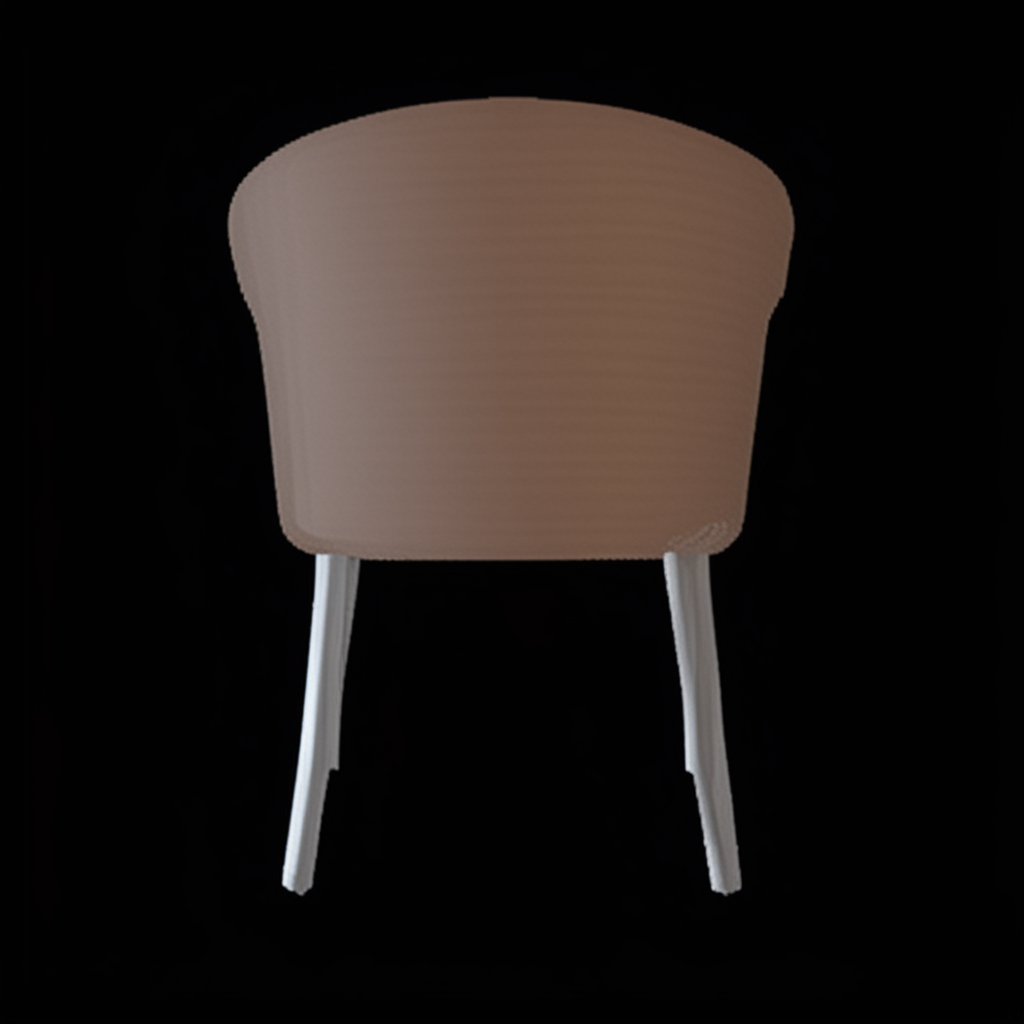

In [7]:
# image = Image.open("output/gen/sample_2/masactrl_step.png").resize((1024, 1024))
# image = Image.open("output/proj/texture.png").resize((512, 512))
image = Image.open("temp/res.png").resize((1024, 1024))
# new = pipeline(prompt="", num_inference_steps=100, denoising_start=0.9, image=image)
new = refiner(prompt="", num_inference_steps=100, denoising_start=0.9, image=image)
# new = pipeline(prompt="a photo of wooden chair", num_inference_steps=100, denoising_start=0.8, image=image)
new.images[0]